In [1]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [22]:
# Load external flat 3D matrix
path = "/home/nicolas/Documentos/Investigación/Simulaciones/Tomosintesis/"
filename = "/home/nicolas/Documentos/Investigación/Simulaciones/Tomosintesis/3Dbulk-tomosin"
bulkDesc = np.genfromtxt(filename)

In [23]:
# Matrix info and unflatten matrix
grid_size = 12
thickness = 4
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
bulkDesc = bulkDesc.reshape(size_depth, size_lat, size_lat).T
print(bulkDesc.shape)

(192, 192, 48)


In [24]:
# Add source position for reference
source = (-4, 0, 1)

dbulk = np.empty(3, dtype=float)
source_int = np.empty(3, dtype=int)

dbulk[0] = 4*thickness/bulkDesc.shape[0]
dbulk[1] = 4*thickness/bulkDesc.shape[1]
dbulk[2] = thickness/bulkDesc.shape[2]
print (dbulk)

source_int[0]=int(round((source[0]+2*thickness)/dbulk[0]))
source_int[1]=int(round((source[1]+2*thickness)/dbulk[1]))   
source_int[2]=int(round((source[2])/dbulk[2]))
print (source_int)

#bulkDesc[source_int[0], source_int[1], source_int[2]]= 4

[0.08333333 0.08333333 0.08333333]
[48 96 12]


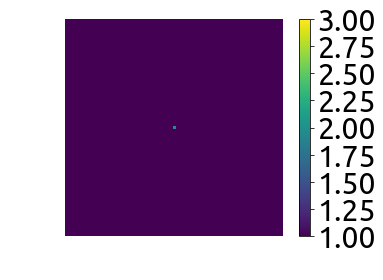

In [25]:
# Save image of z-cut
plt.axis('off')
plt.imshow(bulkDesc[: ,:,15].T,vmin=1,vmax=3)
plt.savefig(path + "3dBulk_trans2_z-cut.png", dpi=300)
plt.colorbar()

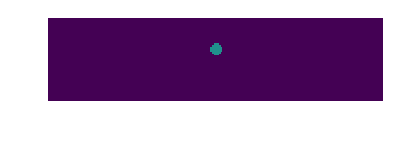

In [27]:
# Save image of y-cut
font = {'family' : 'ubuntu',
        'weight' : 'normal',
        'size'   : 30}
plt.axis('off')
matplotlib.rc('font', **font)
plt.imshow(bulkDesc[:,96,:].T,vmin=1,vmax=3)
plt.savefig(path + "3dBulk_trans2_y-cut.png", dpi=300)